# Сборный проект. Анализ успешности компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Шаг 1. Откройте файл с данными и изучите общую информацию**


Путь к файлу: /datasets/games.csv 


**Шаг 2. Подготовьте данные**


- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


**Шаг 3. Проведите исследовательский анализ данных**


- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


**Шаг 4. Составьте портрет пользователя каждого региона**


- Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?


**Шаг 5. Проверьте гипотезы**


- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.

Поясните:


- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.


**Шаг 6. Напишите общий вывод**



**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd # импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from statistics import variance 



####  Откройте файл с данными и изучите общую информацию

In [2]:
data = pd.read_csv('/datasets/games.csv') # прочитаем csv-файлы

In [3]:
def dataset_info(data): # Функция для ознакомления с датафреймом
    
    display(data.head()) # Выведем первые строки
    print('')
    display(data.info()) # Выведем основную информацию
    print('')
    display(data.describe()) # Расчитаем описательную статистику
    print('')
    display(data.isna().sum()) # Выведем количество пропущенных значений для каждого столбца
    print('=====================================================')
    print(len(data)- len(data.drop_duplicates())) # Подсчитаем количество повторяющихся строк в датафрейме
    print('')
    data.hist(figsize=(10, 8)); # Построим гистограмму для всех числовых столбцов таблицы на одном графике.


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

0



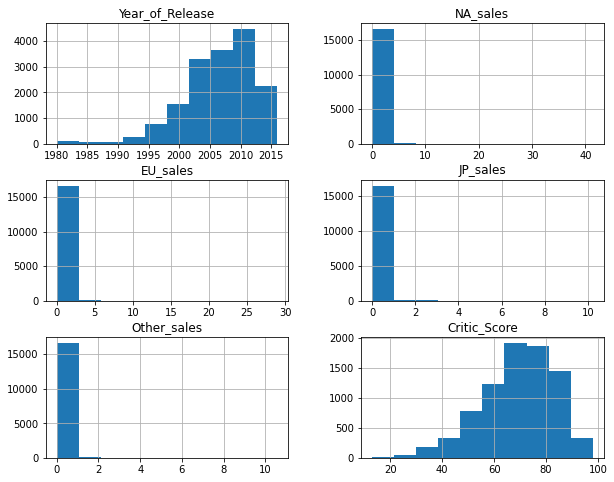

In [4]:
dataset_info(data)

**Вывод**

Датафрейм содержит 16715 строк. Есть пропущенные значения в столбцах 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score' и 'Rating'.

Название столбцов не соответствует единому стилю, необходимо привести всё к нижнему регистру.

Тип данных в столбце 'Year_of_Release' требуется изменить. 'User_Score' необходимо изучить.

'Rating' изучить значения в столбце.

Повторяющие строки в датафрейме отсутствуют.


####  Подготовка данных

**2.1. Заменим названия столбцов (приведем к нижнему регистру)**

In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# # функция для замены названия 
# columns = []
# for i in data.columns:
#     columns.append(i.lower())
# data.columns = columns
# data.columns

In [7]:
#data.columns = map(str.lower, data.columns)
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**2.2. Преобразуем данные в нужные типы**

In [8]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

**Преобразуем 'year_of_release' в 'Int', т.к. год - целое число.** 

In [9]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['year_of_release'].dtype

Int64Dtype()

т.к. в столбце 'user_score' есть аббревиатуру 'tbd', оставим пока так.

Остальные столбцы оставим без изменений.

**2.3. Обработка пропусков**

Пройдёмся по каждому столбцу

- Столбец 'name'

In [10]:
# Проверим пропущенные строки в названии
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Обе игры выпущены в 1993 г. на платформе GEN. Отсортируем таблицу по этим параметрам.

In [11]:
data.query('platform=="GEN" and year_of_release==1993')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Взаимосвязь отутствует, так же у игр не заполнен жанр.

Удалим эти строки, т.к. они составляют менее 1% от всего датафрейма и заполнить их нет возможности. 

In [12]:
data.dropna(subset=['name'], inplace=True)
data.reset_index(inplace=True,drop=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Стало 16 713 строк

Проверим содержание столбца

In [14]:
data['name'].value_counts()

Need for Speed: Most Wanted     12
LEGO Marvel Super Heroes         9
Madden NFL 07                    9
Ratatouille                      9
FIFA 14                          9
                                ..
Bomberman 2                      1
Tokyo Xtreme Racer Zero          1
Cabela's Monster Buck Hunter     1
Scribblenauts                    1
Inazuma Eleven Strikers          1
Name: name, Length: 11559, dtype: int64

Значения в столбце повторяются, т.к. название игр дублируется на разных платформах. 

- Столбец 'platform'

In [15]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Со столбцом всё впорядке. Пропусков нет.

- Столбец 'year_of_release'

In [16]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

In [17]:
display(data[data['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 пропусков.



In [19]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Удалим пустые строки

In [21]:
data.dropna(subset=['year_of_release'], inplace=True)
data.reset_index(inplace=True,drop=True)

In [22]:
# колиество строк после удаления
data.shape

(16444, 11)

Пропуски составляют менее 2% от всего датафрейма. 

Удалили все пропуски в столбце, т.к. заполнить корректно нет возможности. Заполнять исходя из названия игры - в названии содержится не только год, но и номер части игры или что-то ещё. Заполнять по данным из других платформ - игры на разных платормах могут выходить в разное время.

Минимальный год выпуска игр - 1980 г. 

- Столбец 'genre'

In [23]:
data['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Пропуски в столбце отсутствуют, жанры не повторяются. 

- Столбец 'na_sales'

In [24]:
data['na_sales'].describe()

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Минимальное значение - 0, максимальное - 41 миллион проданных копий. Пропуски отсутствуют.

- Столбец 'eu_sales'

In [25]:
data['eu_sales'].describe()

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

Пропуски отсутствуют. Максимальное число проданных копий - 28,9 миллионов.

- Столбец 'jp_sales'

In [26]:
data['jp_sales'].describe()

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

Пропуски отсутствуют. Максимальное число проданных копий - 10,2 миллиона.

- Столбец 'other_sales'

In [27]:
data['other_sales'].describe()

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

Пропуски в столбце отсутствуют. Максимальное число проданных копий - 10,6 миллиона.

- Столбец 'critic_score'

In [28]:
data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [29]:
data['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64

Минимальная оценка 13, максимальная 98 из 100. 

Почти 50% строк не заполнено. Это не связано с годом выпуска игры или количеством продаж.

Заполнить средним или медианой не получится, т.к. это повлияет на дальнейший анализ. Оставим пока без изменений. Тип данных так же оставим без изменений. 

- Столбец 'user_score'

In [30]:
data['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

В столбце присутствует аббревиатуру 'tbd'.

Из доп. источников TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.

Проверим, как много таких строк в датафрейме. 

In [31]:
data[data['user_score']=="tbd"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


2376 строк с "tbd". Это не свзано с годом выхода игры, что очень странно,не связано с оценкой критиков или её отсутствием.
Заменим на 'nan' и поменяем тип данных на 'float', т.к. оценка с плавающей точкой.

In [32]:
data.loc[data['user_score']=="tbd", 'user_score']=np.nan
data['user_score'] = data['user_score'].astype(float)


In [33]:
data['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [34]:
data[data['user_score']=="tbd"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [35]:
data['user_score'].value_counts()

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
2.3      2
0.7      2
1.1      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

In [36]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Данные заменили на 'nan'. Пропуски не возможно заполнить средним или медианой, т.к. это исказит данные и повлияет на дальнейшее исследование. Оставим столбец без изменения. 

- Столбец 'rating'

In [37]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Изучим рейтинг от организации ESRB:

-   «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults").
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.


In [38]:
# проверим, сколько пустых строк
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


6676 строк не заполнено. 

т.к. игры выходили на разных платформах, попробуем заполнить исходя из рейтина указанного на других платформах. 

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [40]:
rat = data.groupby('name')['rating'].first().dropna().to_dict()
data['rating'] = data['rating'].fillna(data['name'].map(rat))

In [41]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [42]:
data['rating'].value_counts()

E       4075
T       3032
M       1621
E10+    1441
EC        10
K-A        4
RP         1
AO         1
Name: rating, dtype: int64

Заполнили 417 пропусков, что удивительно, т.к. внешне не было видно взаимосвязи платформы и рейтинга.

Остальные данные оставим без изменения, т.к. нет возможности их заполнить. 

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           10185 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**2.4. Суммарные продажи во всех регионах**

Создадим отдельный столбец 'sum sales' для подсчёта суммы во всех регионах

In [44]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод по предобработке данных:**

- привели названия столбцов к нижнему регистру
- преобразовали тип данных в 'year_of_release' и 'user_score'
- обработали пропуски и заполнили по возможности в 'столбцах 'user_score' и 'rating'
- создали столбец 'sum_sales' для подсчёта суммы продаж во всех регионах

Удалили около 2% данных, которые невозможно заполнить. 

По большому количеству пропущенных значений с столбцах 'critic_score', 'year_of_release', 'user_score' и 'rating' необходимо обратиться к коллегам, уточнить связано ли это с ошибкой при выгрузке или данные не заполняли изначально, т.к. оценка присваивается не сразу, так же может зависить от региона выпуска игры. 

#### Исследовательский анализ данных

**3.1.Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**


In [45]:
# Создадим свдную таблицу sum_games и посчитаем количество игр выпущенных по годам
sum_games = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
sum_games.columns = ['count']
sum_games

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


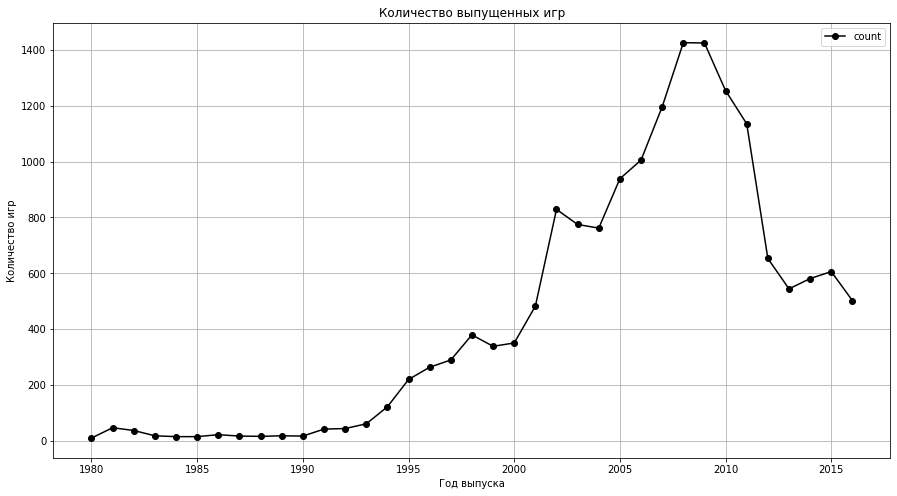

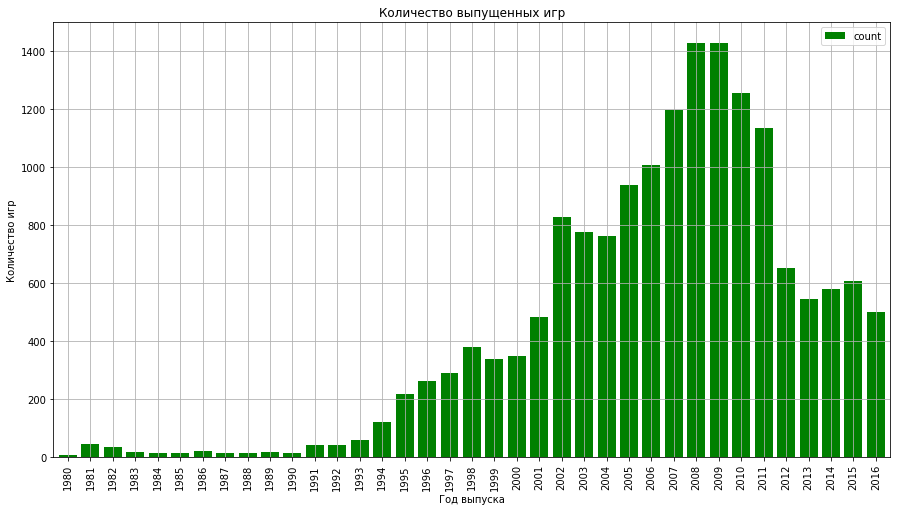

In [46]:
# Построим два графика для наглядности
sum_games.plot(figsize=(15, 8), style='-o', color='black')
plt.grid()
plt.xlabel('Год выпуска');
plt.ylabel('Количество игр');
plt.title('Количество выпущенных игр');
plt.show();

sum_games.plot(kind='bar', figsize=(15, 8), color='green', width=0.8)
plt.grid()
plt.xlabel('Год выпуска');
plt.ylabel('Количество игр');
plt.title('Количество выпущенных игр');


**Вывод:**

До 1994 г выпускали мало игр, но с 1994 г наблюдается резкое увеличение по выпуску. 

2008 - 2009 - пик компьютерных игр.

в 2012 г. произошёл резкий спад выпуска новых игр почти в 2 раза по сравнению с 2009-2010 гг. Возможно, это связано с кризисом в Европе.  

Далее выпуск игр держитя на одном уровне 500 - 600 игр в год. 



**3.2. Анализ продаж по платформам**

Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
Name: sum_sales, dtype: float64


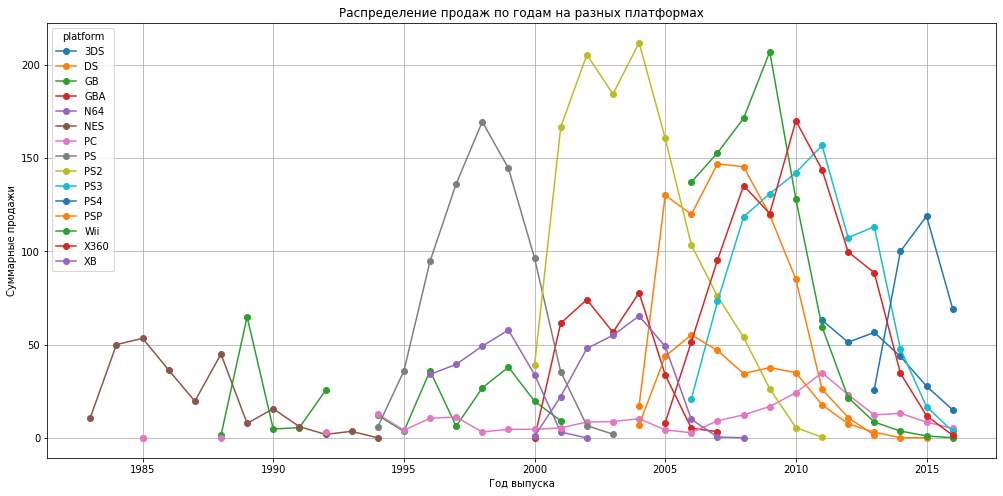

In [47]:
# Сгруппируем данные по 'platform' по 15 платформам
sum_sales = data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(15)

print(sum_sales)

# Отфильтрум данные и сгруппируем
filtered_data = data[data['platform'].isin(sum_sales.index)]
sum_sales_filtered = filtered_data.groupby(['year_of_release', 'platform'])['sum_sales'].sum().unstack()

sum_sales_filtered.plot(figsize=(17, 8), style='-o')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Распределение продаж по годам на разных платформах')
plt.grid(True)


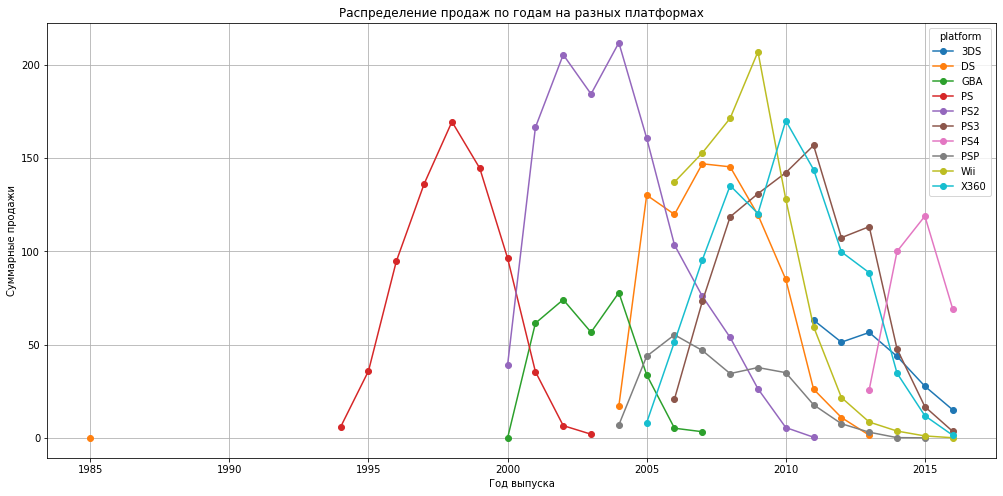

In [48]:
# Построим немного по другому для 10 платформ, для наглядности
top_platforms = (data.groupby('platform')['sum_sales']
                     .sum()
                     .reset_index()
                     .sort_values('sum_sales', ascending = False)
                     .head(10))['platform'].to_list()

pd.pivot_table(data.loc[data['platform'].isin(top_platforms)]
               , index='year_of_release'
               , columns='platform'
               , values='sum_sales'
               , aggfunc='sum').plot(figsize=(17,8), style='-o');
plt.grid(True)
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Распределение продаж по годам на разных платформах');

In [49]:
sum_sales_filtered

platform,3DS,DS,GB,GBA,N64,NES,PC,PS,PS2,PS3,PS4,PSP,Wii,X360,XB
year_of_release,,,,,,,,,,,,,,,
1983,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,0.02,NaN,NaN,NaN,53.44,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,1.43,NaN,NaN,45.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,64.97,NaN,NaN,7.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,4.89,NaN,NaN,15.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,5.57,NaN,NaN,6.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#Посчитаем сколько в среднем лет существует платформа исходя из годов, когда были выпущены игры
print(sum_sales_filtered.count())
print(sum_sales_filtered.count().mean())

platform
3DS      6
DS      11
GB      13
GBA      8
N64      7
NES     12
PC      26
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
Wii     11
X360    12
XB       9
dtype: int64
10.933333333333334


**Вывод:**

Платформы существуют в среднем 10 - 11 лет. PC существует больше 26 лет. Есть платформы, которые просуществовали только в 90х, а есть и те, кто появился совсем недавно - PS3,  Wii. PS4 - самая молодая платформа. 
Самая популярная платформа - PS2, продала во всех регионах больше 1 млр игр. 




**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

Рассмотрим актуальный период 2012-2016 гг, половина от среднего срока существования платформ и последние актуальные годы выпуска игр. 

platform,3DS,DS,GB,GBA,N64,NES,PC,PS,PS2,PS3,PS4,PSP,Wii,X360,XB
year_of_release,,,,,,,,,,,,,,,
2012,51.36,11.01,NaN,NaN,NaN,NaN,23.22,NaN,NaN,107.36,NaN,7.69,21.71,99.74,NaN
2013,56.57,1.54,NaN,NaN,NaN,NaN,12.38,NaN,NaN,113.25,25.99,3.14,8.59,88.58,NaN
2014,43.76,NaN,NaN,NaN,NaN,NaN,13.28,NaN,NaN,47.76,100.00,0.24,3.75,34.74,NaN
2015,27.78,NaN,NaN,NaN,NaN,NaN,8.52,NaN,NaN,16.82,118.90,0.12,1.14,11.96,NaN
2016,15.14,NaN,NaN,NaN,NaN,NaN,5.25,NaN,NaN,3.60,69.25,NaN,0.18,1.52,NaN


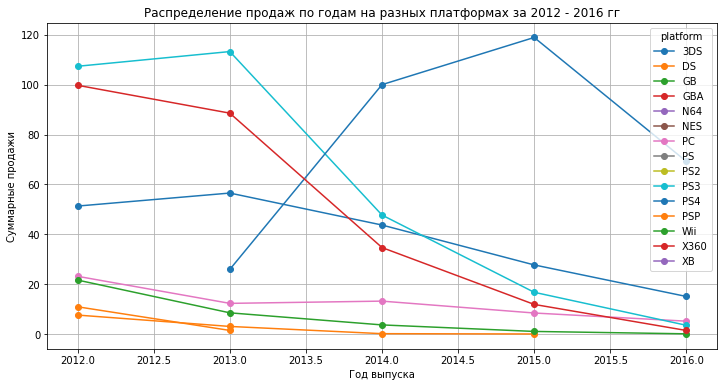

In [51]:
sum_sales_filtered_act = sum_sales_filtered[29:34]
display(sum_sales_filtered_act)

sum_sales_filtered_act.plot(figsize=(12, 6), style='-o')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Распределение продаж по годам на разных платформах за 2012 - 2016 гг')
plt.grid(True)

**Вывод:**

Многие платфрмы прекратили своё существование до 2012 г. Стоит сделать акцент на платформах, которые появились на рынке относительно недавно, например PS4. PS4 появилась в 2013 г и уже завоевала рынок, учитывая её предшественников, эта платформа будет ещё актуальна 4-5 лет.

PC стабильна и актуальна за всё время существования, хоть и не с больши количеством продаж. 

3DS образовалась в 2011 и будет 2-3 года продолжать выпускать новинки, правда уже не в таком количестве. 

Wii и X360 на рынке уже больше 10 лет и их продажи падают, если и будет выпуск игр, то не в больших количествах. 

На основании данных можно спрогнозировать, что в 2017 г. ожидаются увеличенные продажи по PS4.


**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [52]:
#Сохраним данные за актуальный период в actual_platform 2012-2016 гг

actual_platform = data.query('year_of_release > 2011')
display(actual_platform)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [53]:
# Сгруппмируем данные по годам и платформам
best_actual_platform = actual_platform.groupby(['platform', 'year_of_release'])['sum_sales'].sum().reset_index()
best_actual_platform

,platform,year_of_release,sum_sales
0,3DS,2012,51.36
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14
5,DS,2012,11.01
6,DS,2013,1.54
7,PC,2012,23.22
8,PC,2013,12.38
9,PC,2014,13.28


In [54]:
# Сгруппмируем данные по сумме и выведем 5 лидирующих платформ
best_actual_platform_sum = (actual_platform.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)
                            .reset_index().head(5))
best_actual_platform_sum

,platform,sum_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


Интересное замечание, что в данном рейтинге фигурирут платформа XOne, которая не отразилась в рейтинге продаж.
Изучим данную платформу. 

In [55]:
sum_sales_copy = data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(20)
sum_sales_copy

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
Name: sum_sales, dtype: float64

In [56]:
best_actual_platform[best_actual_platform['platform']=='XOne']

,platform,year_of_release,sum_sales
45,XOne,2013,18.96
46,XOne,2014,54.07
47,XOne,2015,60.14
48,XOne,2016,26.15


XOne появилась в 2013 г. Занимает 4 место в топ 5 платформ по выручке, за последние 5 лет.
В рейтинге по продажам, за всё время исследования, занимает 18 место.
Перспективная платформа, как и её предшественник. 

**Вывод:**

Платформы:
- PS4	
- PS3
- X360

лидируют по продажам за последние пять лет.

Далее по рейтингу 3DS, XOne с суммой 160-195 млн.

Продажи растут у PS4 и XOne.

Продажи падают у PS3, X360 и 3DS - возможно, это платформы заменяются на более новые, в связи с чем, продажи падают. 





**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

Построим графики для пяти самых прибыльных платформ по отдельности

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sum_sales, dtype: float64

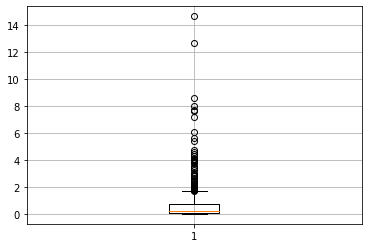

In [57]:
ps4 = actual_platform.query('platform=="PS4"')
plt.boxplot(ps4['sum_sales']);
plt.grid(True)
ps4['sum_sales'].describe()


count    493.000000
mean       0.585781
std        1.462855
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: sum_sales, dtype: float64

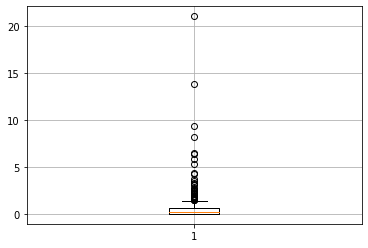

In [58]:
ps3 = actual_platform.query('platform=="PS3"')
plt.boxplot(ps3['sum_sales']);
plt.grid(True)
ps3['sum_sales'].describe()

count    292.000000
mean       0.810068
std        1.712069
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: sum_sales, dtype: float64

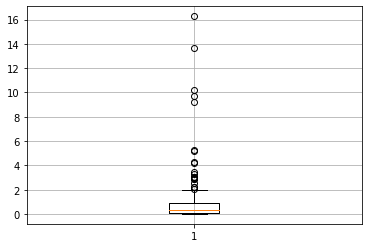

In [59]:
x360 = actual_platform.query('platform=="X360"')
plt.boxplot(x360['sum_sales']);
plt.grid(True)
x360['sum_sales'].describe()

count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: sum_sales, dtype: float64

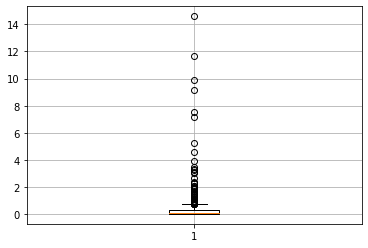

In [60]:
_3ds = actual_platform.query('platform=="3DS"')
plt.boxplot(_3ds['sum_sales']);
plt.grid(True)
_3ds['sum_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sum_sales, dtype: float64

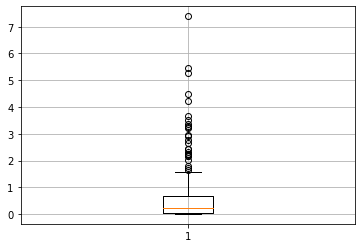

In [61]:
xone = actual_platform.query('platform=="XOne"')
plt.boxplot(xone['sum_sales']);
plt.grid(True)
xone['sum_sales'].describe()

Построим график со всеми бокспотами и изучим медианы, выбросы видны на каждом боксплоте отдельно. 

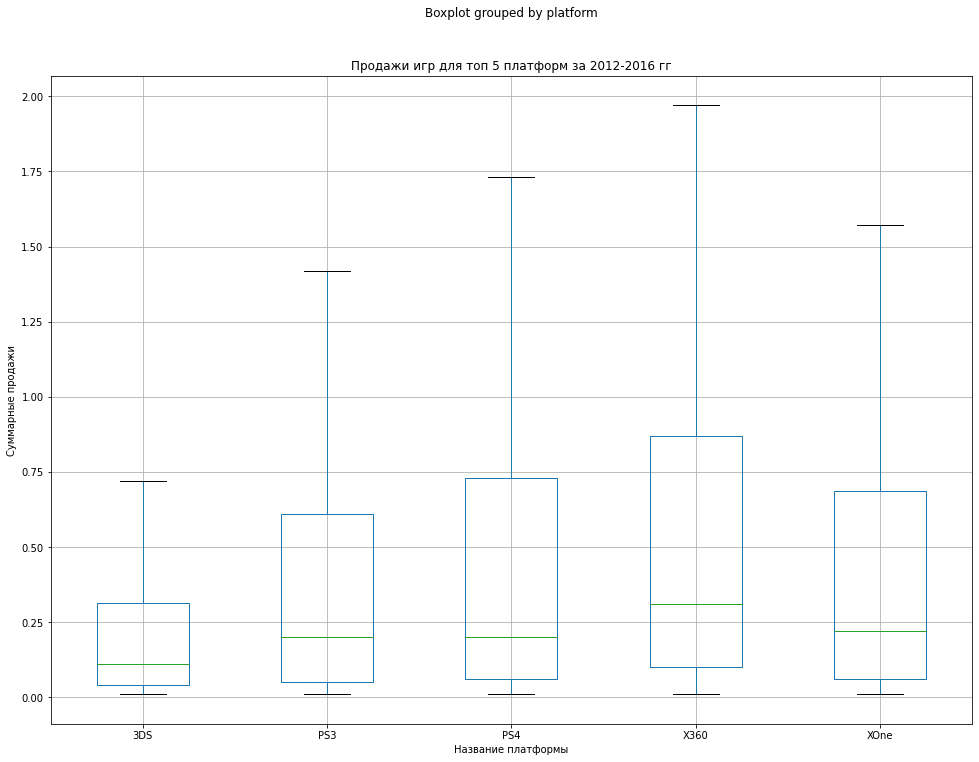

In [62]:
actual_platform_boxplot = actual_platform.query('platform==["PS4", "PS3", "X360", "3DS", "XOne"]')

actual_platform_boxplot.boxplot(column = 'sum_sales', by = 'platform', figsize = (16, 12), showfliers=False)
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи')
plt.title('Продажи игр для топ 5 платформ за 2012-2016 гг');

plt.grid(True)



**Вывод:**

В целом, продажи у плотформ схожи. 
Медиана у PS3 и PS4 одинаковая - 0,2.
XOne близка к этому значению - 0,22
Показатель 3DS близок к 0,1, а вот у X360 - 0,31

Большая часть проданных игр у X360,  близкое к 2,0, а вот у 3DS, значенте близкое к 0,75


Средняя выручка за игру на платформе PS4 - 801 тыс, максимальная 14,6 млн.

Средняя выручка за игру на платформее PS3 - 585 тыс, максимальная 21 млн.

Средняя выручка за игру на платформе X360 - 210 тыс, максимальная 16,2 млн.

Средняя выручка за игру на платформе 3DS - 491 тыс, максимальная 14,6 млн.

Средняя выручка за игру на платформе XOne - 645 тыс, максимальная 7,3 млн.


По выбросам видно, что не так много популярных игр.

Посмотрим, какие были самые популярные игры за 2012-2016 гг

In [63]:
display(actual_platform[actual_platform['sum_sales'] == 14.63])
display(actual_platform[actual_platform['sum_sales'] == 21.05])
display(actual_platform[actual_platform['sum_sales'] == 16.27])
display(actual_platform[actual_platform['sum_sales'] == 14.6])
display(actual_platform[actual_platform['sum_sales'] == 7.39])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.6


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


Самые популярные игры:

- Call of Duty: Black Ops 3
- Grand Theft Auto V  
- Pokemon X/Pokemon Y

Call of Duty: Black Ops 3 и Grand Theft Auto V были популярны сразу на нескольких платформах. 
      

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

,sum_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


              sum_sales  critic_score  user_score
sum_sales      1.000000      0.406568   -0.031957
critic_score   0.406568      1.000000    0.557654
user_score    -0.031957      0.557654    1.000000


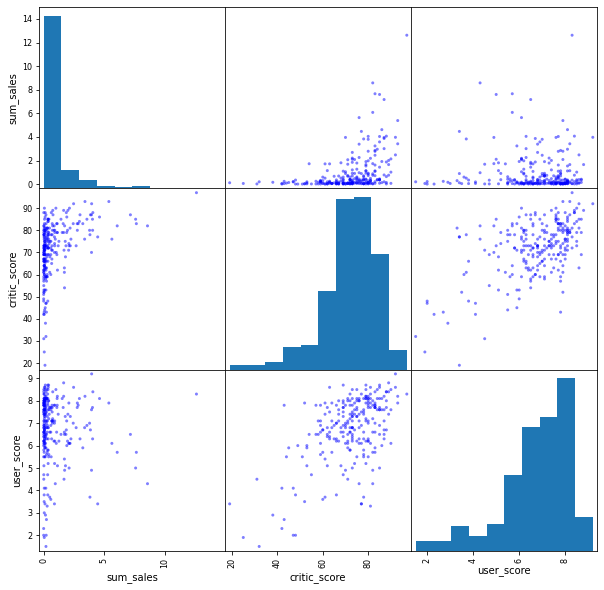

In [64]:
# Сохраним нужные столбцы для анализа в новый датафрейм и посчитаем корреляцию
# Для расчёта возьмём самую прибыльную платформу
ps4_corr = ps4[['sum_sales', 'critic_score', 'user_score']]
display(ps4_corr.head())
print(ps4_corr.corr())
pd.plotting.scatter_matrix(ps4_corr, color='blue', figsize=(10,10));

**Вывод:**

В ячейке sum_sales и critic_score  наблюдается небольшая зависимость. Чем выше оценка критиков, тем больше продаж. 
 Корреляция в 0.41 говорит о наличии связи, но не сильно высокой. 
 
В ячейке sum_sales и user_score зависимость отсутствует. Корреляция -0,03.Оценка пользователей не влияет на продажи. 

**Соотнесите выводы с продажами игр на других платформах.**

Проделаем то же самое для оставшихс платформ

,sum_sales,critic_score,user_score
16,21.05,97.0,8.2
34,13.79,83.0,5.3
69,9.36,71.0,2.6
81,8.17,88.0,6.6
126,6.46,86.0,4.3


              sum_sales  critic_score  user_score
sum_sales      1.000000      0.331497   -0.005144
critic_score   0.331497      1.000000    0.539456
user_score    -0.005144      0.539456    1.000000


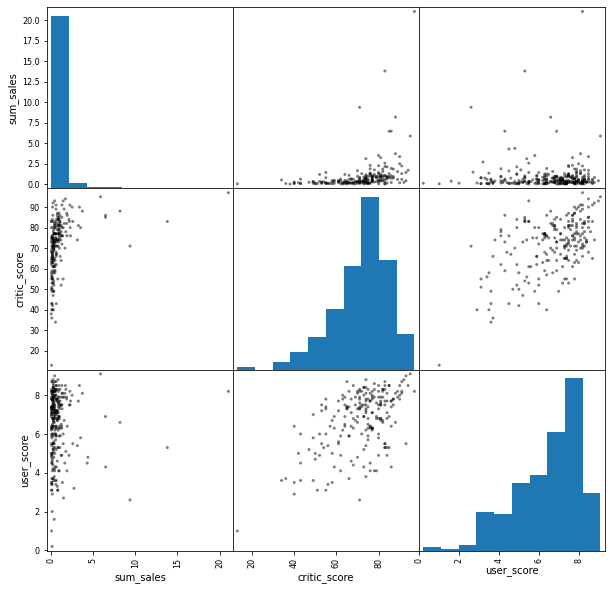

In [65]:
ps3_corr = ps3[['sum_sales', 'critic_score', 'user_score']]
display(ps3_corr.head())
print(ps3_corr.corr())
pd.plotting.scatter_matrix(ps3_corr, color='black', figsize=(10,10));

**Вывод:**

В ячейке sum_sales и critic_score наблюдается слабая зависимость. Корреляция в 0.33 говорит о наличии слабой связи. На некоторые игры влияет оценка критиков.

В ячейке sum_sales и user_score зависимость отсутствует. Корреляция -0,005.Оценка пользователей не влияет на продажи.

,sum_sales,critic_score,user_score
23,16.27,97.0,8.1
35,13.68,83.0,4.8
60,10.24,73.0,2.6
66,9.71,87.0,7.0
72,9.18,NaN,NaN


              sum_sales  critic_score  user_score
sum_sales      1.000000      0.360573    0.006164
critic_score   0.360573      1.000000    0.557352
user_score     0.006164      0.557352    1.000000


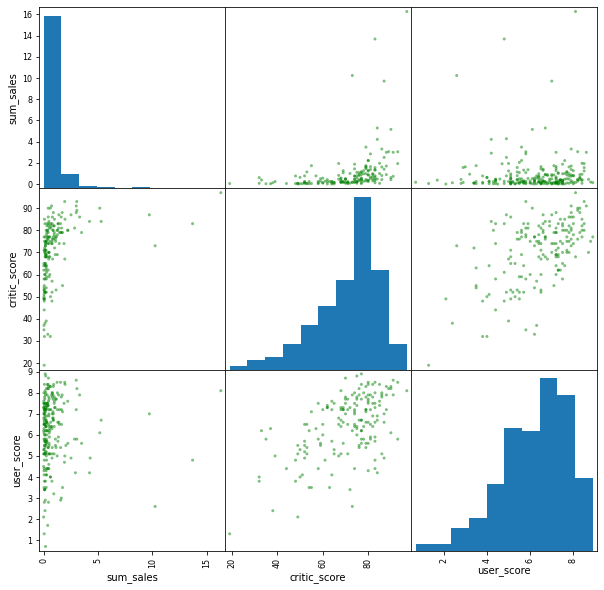

In [66]:
x360_corr = x360[['sum_sales', 'critic_score', 'user_score']]
display(x360_corr.head())
print(x360_corr.corr())
pd.plotting.scatter_matrix(x360_corr, color='green', figsize=(10,10));

**Вывод:**

В ячейке sum_sales и critic_score наблюдается слабая зависимость. Корреляция в 0.36 говорит о наличии слабой связи. На некоторые игры влияет оценка критиков.

В ячейке sum_sales и user_score зависимость отсутствует. Корреляция -0,006.Оценка пользователей не влияет на продажи.

,sum_sales,critic_score,user_score
33,14.60,NaN,NaN
47,11.68,NaN,NaN
62,9.90,78.0,7.2
73,9.17,88.0,8.7
96,7.55,NaN,NaN


              sum_sales  critic_score  user_score
sum_sales      1.000000      0.320803    0.197583
critic_score   0.320803      1.000000    0.722762
user_score     0.197583      0.722762    1.000000


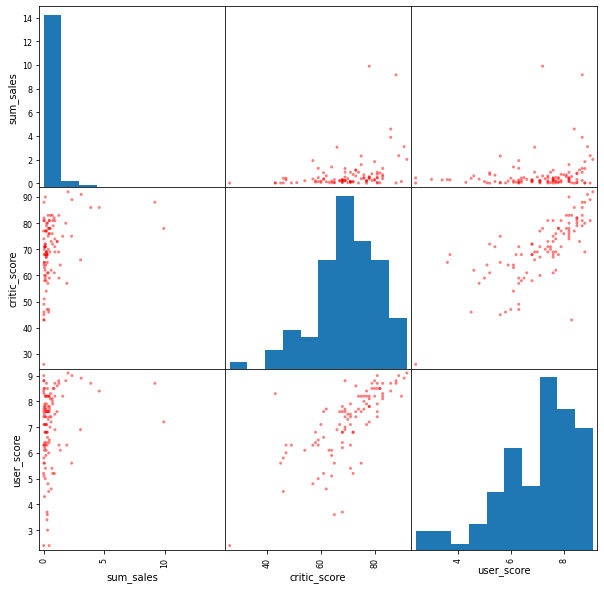

In [67]:
_3ds_corr = _3ds[['sum_sales', 'critic_score', 'user_score']]
display(_3ds_corr.head())
print(_3ds_corr.corr())
pd.plotting.scatter_matrix(_3ds_corr, color='red', figsize=(10,10));

**Вывод:**

В ячейке sum_sales и critic_score наблюдается слабая зависимость. Корреляция в 0.32 говорит о наличии слабой связи. Оценка критиков не сильно влияет на большие продажи. 

В ячейке sum_sales и user_score зависимость очень слабая. Корреляция 0,19. Оценка пользователей не сильно влияет на количество продаж.

,sum_sales,critic_score,user_score
99,7.39,NaN,NaN
165,5.47,97.0,7.9
179,5.26,81.0,5.4
241,4.49,84.0,6.4
269,4.22,88.0,6.2


              sum_sales  critic_score  user_score
sum_sales      1.000000      0.416998   -0.068925
critic_score   0.416998      1.000000    0.472462
user_score    -0.068925      0.472462    1.000000


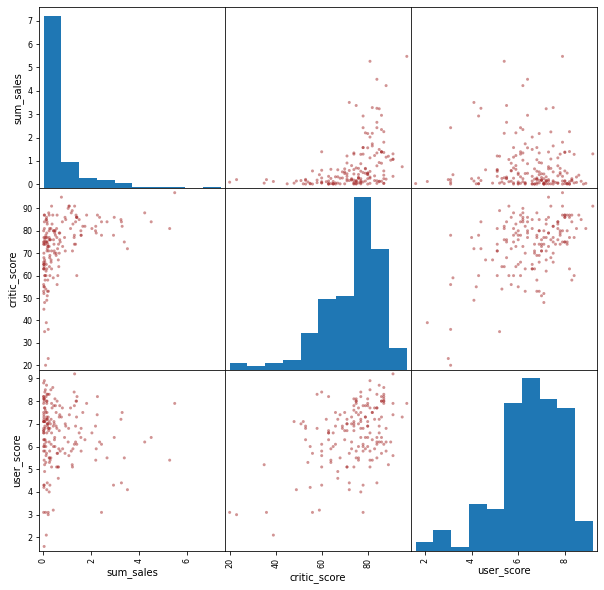

In [68]:
xone_corr = xone[['sum_sales', 'critic_score', 'user_score']]
display(xone_corr.head())
print(xone_corr.corr())
pd.plotting.scatter_matrix(xone_corr, color='brown', figsize=(10,10));

**Вывод:**


В ячейке sum_sales и critic_score  наблюдается небольшая зависимость. Чем выше оценка критиков, тем больше продаж. 
 Корреляция в 0.42 говорит о наличии связи, но не сильно высокой. 
 
В ячейке sum_sales и user_score зависимость отсутствует. Корреляция -0,06.Оценка пользователей не влияет на продажи. 

**Вывод:**

Платформы PS4 и XOne, X360, PS3 похожи по уровням зависимости. Оценки критиков влияют на продажи, в то время как оценка пользователей не влияет на количество продаж.

У платформы 3DS продажи не сильно зависят от оценки критиков, но оценка пользователей чуть заметнее сказывается на продажах, чем на других платформах. 

Можно проверить, сколько игр выпустила каждая платформа за актуальный период, проверить, как количество выпущенных игр зависит от оценок.

In [69]:
name_count = actual_platform.groupby('platform')['name'].count().sort_values(ascending=False).reset_index()
name_count
#print(name_count[(name_count['platform']=='PS3') & (name_count['platform']=='PS4')])
name_count.query('platform == ["PS4", "PS3", "XOne", "X360", "3DS"]')

,platform,name
0,PS3,493
2,3DS,396
3,PS4,392
4,X360,292
6,XOne,247


**Вывод:**

3DS, у которой оценка пользователей немного влияет на продажи, выпускает больше игр чем PS4, X360 и XOne, у которых зависимость практически одинаковая.


**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [70]:
# Сгруппируем данные по жанрам и посчитаем количество игр
genre_actual = actual_platform.groupby('genre')['name'].count().sort_values(ascending=False)
genre_actual

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: name, dtype: int64

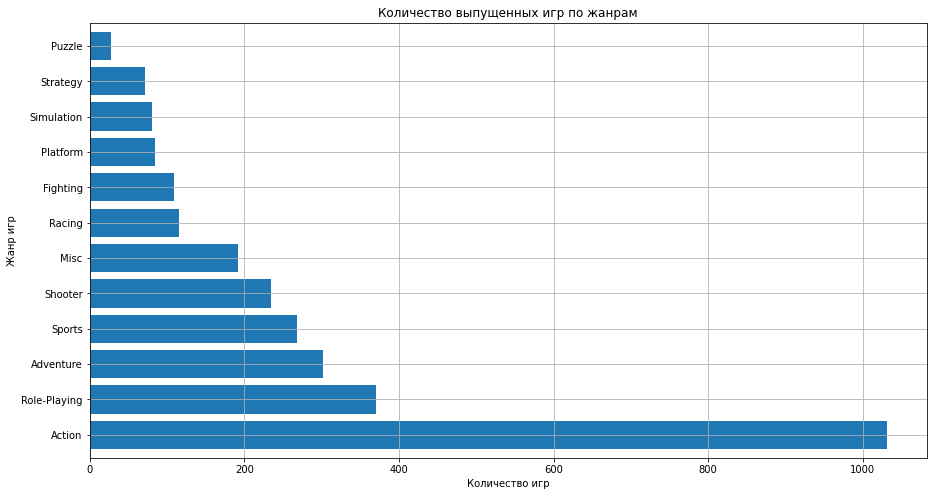

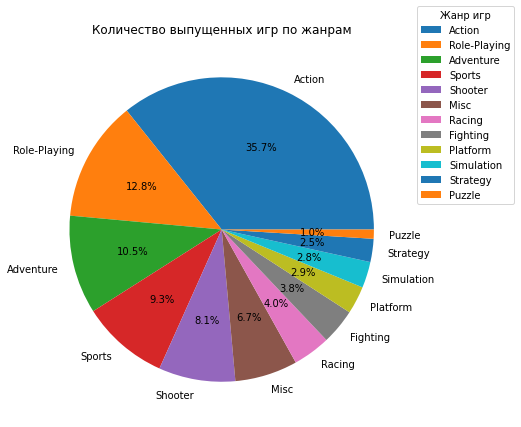

In [71]:
# Построим график для наглядности
genre_actual.plot(kind='barh', figsize=(15, 8), width=0.8)
plt.grid()
plt.xlabel('Количество игр');
plt.ylabel('Жанр игр');
plt.title('Количество выпущенных игр по жанрам');

plt.show();

genre_actual.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 7))
plt.ylabel('');
plt.legend(title='Жанр игр', loc='upper left', bbox_to_anchor=(1.0, 1.1))
plt.title('Количество выпущенных игр по жанрам');


Самый популярный жанр выпущенных игр за 2012-2016 - Action, Role-Playing, Adventure, Sports и Shooter.

Меньше всего выпускают игр в жанре Puzzle, Strategy и Simulation

In [72]:
# Сгруппируем данные по жанрам и посчитаем сумму продаж
genre_sum = actual_platform.groupby('genre')['sum_sales'].sum().sort_values(ascending=False)
genre_sum

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: sum_sales, dtype: float64

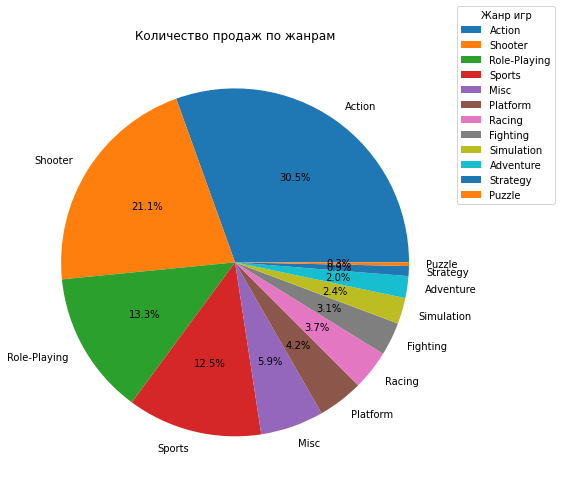

In [73]:
genre_sum.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 8))
plt.ylabel('');
plt.legend(title='Жанр игр', bbox_to_anchor=(1.0, 1.1))
plt.title('Количество продаж по жанрам');

**Вывод:**

Самые продаваемые игры за последние пять лет - Action, Shooter, Role-Playing, Sports и Misc.

Puzzle, Strategy, Adventure и Simulation стали совсем не популярны.

Игравая индустрия развивается, сейчас пользователям нравится красивая картинка, простота, экшен. Ранее, когда игры были не так развиты, люди предпочитали головоломки, стратегии. В данный момент этот жанр не выпускают, т.к. подобные игры можно найти бесплатно в соц сетях или на платформах, они стали менее интересными. Ранее хорошая стратегия разрабатывалась не один год и была очень популярна, но сейчас игры выпускаются куда быстрее. Да, есть компании которые разрабатывают одну игру больше 2-3 лет, но это игра ожидаема для пользователей и они готовы столько ждать. 
   

Сумма, не всегда показатель, потому что может быть одна продаваемая игра, а среднее даст оценку всему жанру.

In [74]:
genre_mean = actual_platform.groupby('genre')['sum_sales'].mean().sort_values(ascending=False)
genre_mean

genre
Shooter         1.296723
Platform        0.717647
Sports          0.675634
Role-Playing    0.521081
Racing          0.465217
Misc            0.442917
Simulation      0.439000
Action          0.427856
Fighting        0.408165
Strategy        0.187887
Puzzle          0.174643
Adventure       0.097450
Name: sum_sales, dtype: float64

Средняя выручка по жанрам отличается от общей суммы.

Лидирует жанр Shooter.
На втором месте спортивные игры, а третье занимает Platform - прыжки по платформам и т.д.

Экшн игра занимают 4 место, а РПГ лишь 7.

Вывод - если в жанре есть самая популярная и продаваемая игра, это не значит, что жанр становится самым популярным. 


**Вывод по исследовательскому анализу данных:**

Игравая индустрия очень быстро развивается, меняются предпочтения пользователей. Проанлизировав данные, установили, что в среднем, платформа существует 10 - 11 лет. Появляются новые игровые платформы, которые захватывают мир, например PS4.

Самые популярные жанры игр -Shooter, Sports, Platform, Action и Misc.
Если рассматривать самые прибыльные жанры по продажам, то тут всё может зависить от одной игры, которая продаётся миллионами и картина тут немного другая.

Самые популярные платформы -  PS4, PS3, X360, XOne и 3DS.

На основании данных можно спрогнозировать, что в 2017 г. ожидаются увеличенные продажи по PS4 и XOne, как новые и популярные платформа, следующие по истории своих предшественников. 

#### Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Самые популярные платформы (топ-5)**

Создадим сводные таблицы для каждого региона и посчитаем сумму продаж.

In [75]:
na_actual_platform = actual_platform.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
na_actual_platform


platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

In [76]:
eu_actual_platform = actual_platform.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
eu_actual_platform

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

In [77]:
jp_actual_platform = actual_platform.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
jp_actual_platform

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

Для наглядности представим всё на графике.

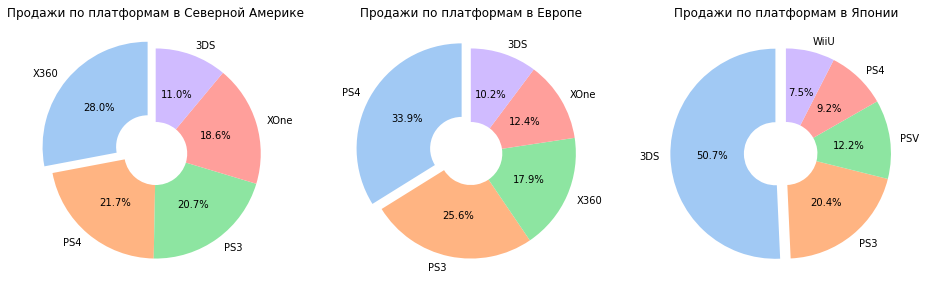

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(16, 9))
explode = (0.1, 0, 0, 0, 0)
labels1 = na_actual_platform.index
labels2 = eu_actual_platform.index
labels3 = jp_actual_platform.index

colors = sns.color_palette('pastel')[ 0:5 ]

(axs[0].pie(na_actual_platform, labels=labels1, autopct='%1.1f%%', startangle=90, colors = colors, 
            wedgeprops=dict(width=0.7), explode= explode))
axs[0].set_title('Продажи по платформам в Северной Америке')


(axs[1].pie(eu_actual_platform, labels=labels2, autopct='%1.1f%%', startangle=90, colors = colors, 
            wedgeprops=dict(width=0.7), explode= explode))
axs[1].set_title('Продажи по платформам в Европе')

(axs[2].pie(jp_actual_platform, labels=labels3, autopct='%1.1f%%', startangle=90, colors = colors, 
            wedgeprops=dict(width=0.7), explode= explode))
axs[2].set_title('Продажи по платформам в Японии')

plt.show()

**Вывод:**

Самые популярные платформы в Северной Америке - X360, PS4, PS3, XOne и 3DS.

Самые популярные платформы в Европе - PS4, PS3, X360, XOne и 3DS.

Самые популярные платформы в Японии - 3DS, PS3, PSV, PS4 и WiiU.

Рынок Северной Америки и Европы схож по платформам, но немного отличается в процентном соотношении.

Рынок Японии очень отличается. В лидерах платформа 3DS, в то время, как PS4 составляет лишь 9 % от всех популярных платформ. 
Nintendo 3DS поступила в продажу в Японии в 2011 г., не удивительно, что это одна из самых популярных платформ в стране.

PS3 популярна во всех регионах и держится в топ 3.

Интересно, что в Европе самая популярная платформа PS4, учитывая, что она вышла на рынок только в 2013 г., в то время как в Северной Америке топ возвышает старенькая X360.

Не стоит так же забывать о конуцренции Microsoft и Sony.

**Самые популярные жанры (топ-5)**

Создадим сводные таблицы и посчитаем количество популярных жанров

In [79]:
na_genre = actual_platform.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
na_genre 

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

In [80]:
eu_genre = actual_platform.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
eu_genre 

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

In [81]:
jp_genre = actual_platform.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
jp_genre

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

Для сравнения представим всё на графике.

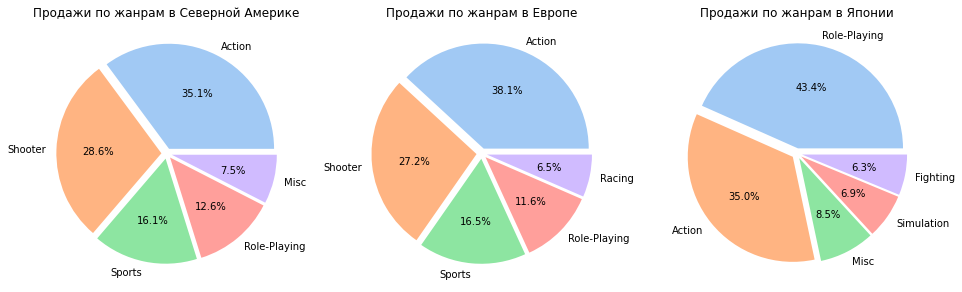

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(16, 9))
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
labels1 = na_genre.index
labels2 = eu_genre.index
labels3 = jp_genre.index

colors = sns.color_palette('pastel')[ 0:5 ]

(axs[0].pie(na_genre, labels=labels1, autopct='%1.1f%%', colors = colors, explode= explode))
axs[0].set_title('Продажи по жанрам в Северной Америке')


(axs[1].pie(eu_genre, labels=labels2, autopct='%1.1f%%', colors = colors, explode= explode))
axs[1].set_title('Продажи по жанрам в Европе')

(axs[2].pie(jp_genre, labels=labels3, autopct='%1.1f%%', colors = colors, explode= explode))
axs[2].set_title('Продажи по жанрам в Японии')


plt.show()

**Вывод:**

Самые популярные жанры игр в Северной Америке - Action, Shooter, Sports, Role-Playing и Misc.

Самые популярные жанры игр в Европе - Action, Shooter, Sports, Role-Playing и Racing.

Самые популярные жанры игр в Японии - Role-Playing, Action, Misc, Simulation и Fighting.

Рынок игр Запада и Востока очень отличается. В Японии очень популярны РПГ игры, в то время как в Северной Америке и Европе Экшен игры.
Большинство ролевых игр было разработано в Японии, для внутреннего рынка. У РПГ игр свою мир, развитый южет, гемплей.

Экшн игры популярны во всём мире - выполнение заданий, быстрая реакция и т.д. 

Шутер игры занимаю второе место на Западе, а вот в Японии, этот жанр не особо популярен. 

Рынок Северной Америки и Еввропы очень похож. 



**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [83]:
actual_platform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   Int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1758 non-null   object 
 11  sum_sales        2886 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 295.9+ KB


Много пропусков в столбце 'rating', заполнять их статистическими методами не будем, т.к. можно сильно ошибиться. Можно конечно заполнить по самому популярному жанру на платформе, но он не будет корректный и помешает анализу. Оставим столбец без изменения и проанализируем те данные, что заполнены.


Создадим сводные таблицы и рассчитаем продажи по каждому жанру.

In [84]:
na_rating = actual_platform.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()
na_rating 

rating
M       239.96
E       117.79
E10+     77.84
T        69.80
Name: na_sales, dtype: float64

In [85]:
eu_rating = actual_platform.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()
eu_rating 

rating
M       202.99
E       115.40
E10+     57.92
T        57.04
Name: eu_sales, dtype: float64

In [86]:
jp_rating = actual_platform.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()
jp_rating 

rating
E       29.27
T       29.13
M       22.20
E10+     8.57
Name: jp_sales, dtype: float64

Отразим все результаты через график.

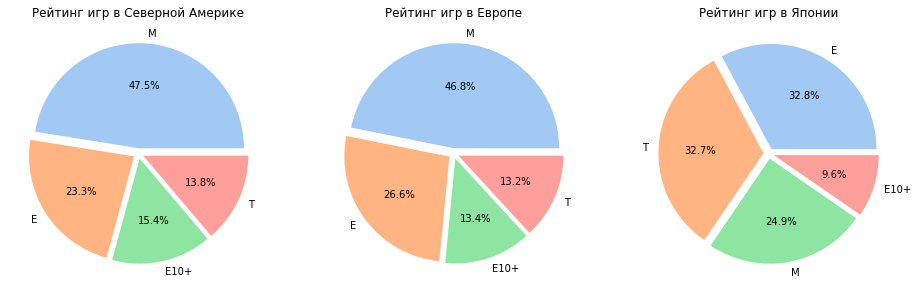

In [87]:
fig, axs = plt.subplots(1, 3, figsize=(16, 9))
explode = (0.05, 0.05, 0.05, 0.05)
labels1 = na_rating.index
labels2 = eu_rating.index
labels3 = jp_rating.index

colors = sns.color_palette('pastel')[ 0:5 ]

(axs[0].pie(na_rating, labels=labels1, autopct='%1.1f%%', colors = colors, explode= explode))
axs[0].set_title('Рейтинг игр в Северной Америке')


(axs[1].pie(eu_rating, labels=labels2, autopct='%1.1f%%', colors = colors, explode= explode))
axs[1].set_title('Рейтинг игр в Европе')

(axs[2].pie(jp_rating, labels=labels3, autopct='%1.1f%%', colors = colors, explode= explode))
axs[2].set_title('Рейтинг игр в Японии')

plt.show()

- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»

В Северной Америке и Европе распределение игр по рейтингам почти одинаковое. Лидируют игры для взрослых, старше 17 лет. Далее игры для всех и для +10 лет.

В Японии ситуация немного другая, больше игр выпускается для всех, потом для подростков, а после уже для взрослых. Акцент больше на молодых пользователей.




**Вывод по портрету пользователей каждого региона:**

Портрет игрока в Северной Америке - Взрослые от 17 лет, предпочитают платформу X360, жанр Экшен. 

Портрет игрока в Европа - Взрослые от 17 лет, предпочитают PS4, жанр Экшен.  

Портрет игрока в Японии  - Молодые люди от 13 лет, предпочитаю Nintendo 3DS, жанр РПГ. 
    

#### Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

In [88]:
actual_platform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   Int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1758 non-null   object 
 11  sum_sales        2886 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 295.9+ KB


т.к. в столбце 'user_score' есть пропуски, которые невозможно заполнить, удалим эти строки из датафрейма для анализа и подсчёта дисперсии.

In [89]:
actual_platform = actual_platform.dropna(subset=['user_score'])

xone_user_score = actual_platform.loc[actual_platform['platform']=='XOne', 'user_score']
pc_user_score = actual_platform.loc[actual_platform['platform']=='PC', 'user_score']

print(xone_user_score)
print(pc_user_score)
print('Количество строк по xone:', xone_user_score.count())
print('Количество строк по pc:',  pc_user_score.count())
print('Среднее значение по xone:', xone_user_score.mean())
print('Среднее значение по pc:', pc_user_score.mean())
print('Дисперсия:', variance(xone_user_score))
print('Дисперсия:', variance(pc_user_score))

165      7.9
179      5.4
241      6.4
269      6.2
372      4.1
        ... 
16273    6.8
16326    6.0
16359    8.2
16372    6.6
16389    6.7
Name: user_score, Length: 182, dtype: float64
191      4.0
455      3.9
679      7.9
948      4.8
1084     7.9
        ... 
16193    6.8
16239    7.9
16248    1.4
16313    7.9
16421    7.6
Name: user_score, Length: 206, dtype: float64
Количество строк по xone: 182
Количество строк по pc: 206
Среднее значение по xone: 6.521428571428572
Среднее значение по pc: 6.4286407766990274
Дисперсия: 1.9069968429360693
Дисперсия: 2.7704439971584183


Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются. 

Чтобы проверить такую гипотезу, передадим в метод ttest_ind()сначала выборку по рейтингам по платформе XOne (xone_user_score), затем выборку по рейтингам по платформе pc (pc_user_score). 

Используем дополнительный параметр equal_var = False, т.к. большая разница в дисперсиях. 

Уровень статистической значимости возьмём 0,05, т.к. нам не нужны очень точные значения.
    

In [90]:
alpha = 0.05

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var = False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Рейтинги равны')
else:
    print('Не получилось отвергнуть нулевую гипотезу: рейтинги не равны')


p-value: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу: рейтинги не равны


**Вывод:**

Полученное значение p-value 0.549 больше заданного уровня значимости, поэтому не получилось отвергнуть нулевую гипотезу, что подтверждает, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Гипотеза подтверждена.


**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Проверим вторую гипотезу.

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action  и Sports  разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action  и Sports одинаковые.
    
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action  и Sports различаются. 

Чтобы проверить такую гипотезу, передадим в метод ttest_ind()сначала выборку по рейтингам с жанром Action  (action_user_score), затем выборку с жанром Sports (sports_user_score). 

Используем дополнительный параметр equal_var = False, т.к. большая разница в дисперсиях. 

Уровень статистической значимости возьмём 0,05, т.к. нам не нужны очень точные значения.

In [91]:
action_user_score = actual_platform.loc[actual_platform['genre']=='Action', 'user_score']
sports_user_score = actual_platform.loc[actual_platform['genre']=='Sports', 'user_score']

print('Количество строк по action:', action_user_score.count())
print('Количество строк по sports:', sports_user_score.count())
print('Среднее значение по action:', action_user_score.mean())
print('Среднее значение по sports:', sports_user_score.mean())
print('Дисперсия по action:', variance(action_user_score))
print('Дисперсия по sports:', variance(sports_user_score))


Количество строк по action: 523
Количество строк по sports: 195
Среднее значение по action: 6.825047801147227
Среднее значение по sports: 5.455897435897437
Дисперсия по action: 1.889084049434811
Дисперсия по sports: 3.0228902987047315


In [92]:
alpha = 0.05

results = st.ttest_ind(action_user_score, sports_user_score, equal_var = False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Рейтинги равны')
else:
    print('Не получилось отвергнуть нулевую гипотезу: рейтинги не равны')

p-value: 4.24307776572644e-20
Отвергаем нулевую гипотезу: Рейтинги равны


**Вывод:**

Полученное значение p-value 4,24 больше заданного уровня значимости, поэтому не получилось отвергнуть нулевую гипотезу, что подтверждает, что средние пользовательские рейтинги жанров Action  и Sports  разные. 

Гипотеза подтверждена.

**Общий вывод:**

Мы изучили из открытых источников  исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

В ходе обработки данных:
- выболнили обработку датафрейма и преобразовали типы данных.
- удалили пропуки в столбцах 'name', 'year_of_release'.
- заполнили часть пропусков в столбце 'rating'
- добавили в датафрейм столбец 'sum_sales' с суммарными продажи во всех регионах.
- столбцы 'critic_score' и 'user_score' оставили без изменений.
- дубликаты не обнаружили. 

В ходе исследовательского анализа выяснили что:
- игравая индустрия очень быстро развивается, с чем меняются и предпочтения пользователей.
- среднее существование игровой платформы - 10 - 11 лет.
- самые популярные жанры игр за 2012 -2016 гг - Shooter, Sports, Platform, Action и Misc.
- самые популярные платформы за 2012 -2016 гг -  PS4, PS3, X360, XOne и 3DS.
- оценка критиков больше влияет на продажи у PS4 и XOne, X360, PS3.
- незначительное влияние оценки пользователей на платформе 3DS. 
- составили портрет пользователя каждого региона:
  - Портрет игрока в Северной Америке - Взрослые от 17 лет, предпочитают платформу X360, жанр Экшен.
  - Портрет игрока в Европа - Взрослые от 17 лет, предпочитают PS4, жанр Экшен.
  - Портрет игрока в Японии - Молодые люди от 13 лет, предпочитаю Nintendo 3DS, жанр РПГ.
-выяснили, что рынок Северной Америки и Европы схож, в то время, как рынок Японии отличается.


На основании изученных данных можно спрогнозировать, что в 2017 г. ожидаются увеличенные продажи по PS4 и XOne , т.к. платформы образовалась в 2013 г. и становятся популярными, как и их предшественники. Сделать акцент на играх с жанрами Shooter, Sports, Action, но, если делать акцент на Японский рынок, то стоит рассмотреть жанр РПГ. 


Проверили и подтвердили две гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
